In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import seaborn as sns
import time

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
tweets = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1', names = ['label','id','date','noquery','handler','tweet'])

In [3]:
tweets.head()

,label,id,date,noquery,handler,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets[tweets['handler']=='jtmal0723']

,label,id,date,noquery,handler,tweet
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm
500,0,1467936498,Mon Apr 06 22:53:39 PDT 2009,NO_QUERY,jtmal0723,@Anistorm Sorry
1733,0,1468219521,Tue Apr 07 00:22:07 PDT 2009,NO_QUERY,jtmal0723,@jmielcarz send some of that warmness my way.....
37902,0,1573108534,Mon Apr 20 23:45:17 PDT 2009,NO_QUERY,jtmal0723,@Anistorm what's wrong?
261409,0,1985909023,Sun May 31 18:00:15 PDT 2009,NO_QUERY,jtmal0723,likes that it is windy at work so he isn't as ...
606365,0,2222571467,Thu Jun 18 07:09:49 PDT 2009,NO_QUERY,jtmal0723,@twckellycass the light at the video wall is r...
866347,4,1677596948,Sat May 02 02:57:06 PDT 2009,NO_QUERY,jtmal0723,"@TWCWeekends Happy 27th birthday, you guys"
1288967,4,2002549306,Tue Jun 02 04:31:54 PDT 2009,NO_QUERY,jtmal0723,@YourWxToday other than a few burnt out lights...


In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
label      1600000 non-null int64
id         1600000 non-null int64
date       1600000 non-null object
noquery    1600000 non-null object
handler    1600000 non-null object
tweet      1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
tweets.drop(['id', 'date','noquery','handler'], axis=1, inplace=True)

In [7]:
tweets.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
tweets.groupby('label').describe()

tweet                                        
        count  unique                        top freq
label                                                
0      800000  790185  isPlayer Has Died! Sorry   210
4      800000  793506              good morning   118

In [9]:
tweets['length'] = tweets['tweet'].apply(len)
tweets.head()

,label,tweet,length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [10]:
tweets['label'].value_counts()

4    800000
0    800000
Name: label, dtype: int64

In [11]:

tweets['label'] = tweets['label'].map({0: 0, 4: 1})

In [12]:
tweets.length.describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: length, dtype: float64

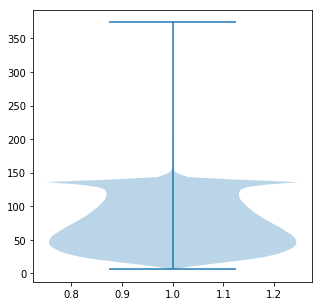

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.violinplot(tweets['length'])
plt.show()

In [14]:
tweets[tweets['length'] == 374]['tweet']

1295281    @catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...
Name: tweet, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000010F9847B3C8>,
      dtype=object)

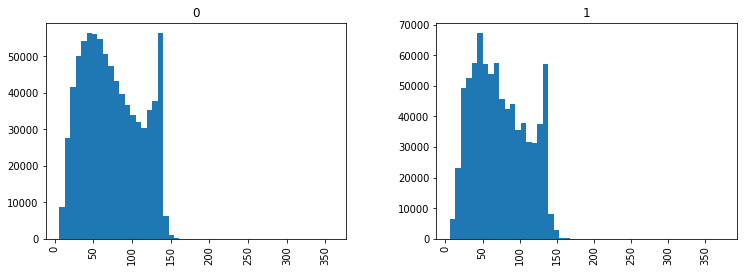

In [15]:
tweets.hist(column='length', by='label', bins=50,figsize=(12,4))

In [16]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from bs4 import BeautifulSoup
import re

In [17]:
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    from nltk.stem import WordNetLemmatizer
    lemmer=WordNetLemmatizer()
    words=[' '.join([lemmer.lemmatize(word) for word in text.split(' ')]) for text in words]
    return (" ".join(words)).strip()

In [18]:
%%time
print("Cleaning the tweets...\n")
clean_tweet_texts = []
for i in range(0,len(tweets)):
    if( (i+1)%100000 == 0 ):
        print ("Tweets %d of %d has been processed" %(i+1,len(tweets)))                                                                    
    clean_tweet_texts.append(tweet_cleaner_updated(tweets['tweet'][i]))

Cleaning the tweets...

Tweets 100000 of 1600000 has been processed
Tweets 200000 of 1600000 has been processed
Tweets 300000 of 1600000 has been processed
Tweets 400000 of 1600000 has been processed
Tweets 500000 of 1600000 has been processed
Tweets 600000 of 1600000 has been processed
Tweets 700000 of 1600000 has been processed


C:\Users\arush\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b' i just received my G8 viola exam.. and its... well... .. disappointing.. :\\..'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 800000 of 1600000 has been processed
Tweets 900000 of 1600000 has been processed
Tweets 1000000 of 1600000 has been processed
Tweets 1100000 of 1600000 has been processed
Tweets 1200000 of 1600000 has been processed


C:\Users\arush\Anaconda3\lib\site-packages\bs4\__init__.py:219: UserWarning: "b'E3 ON PLAYSTATION HOME IN ABOUT AN HOUR!!!!!!!!!! \\../  \\../'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


Tweets 1300000 of 1600000 has been processed
Tweets 1400000 of 1600000 has been processed
Tweets 1500000 of 1600000 has been processed
Tweets 1600000 of 1600000 has been processed
Wall time: 20min 30s


In [19]:
len(clean_tweet_texts)

1600000

In [20]:
clean_tweets = pd.DataFrame(clean_tweet_texts,columns=['clean tweet'])
clean_tweets['label'] = tweets['label']

In [21]:
clean_tweets['label'].value_counts()

1    800000
0    800000
Name: label, dtype: int64

In [22]:
clean_tweets.to_csv('clean_tweet.csv',encoding='utf-8')

In [23]:
csv = 'clean_tweet.csv'
clean_tweets = pd.read_csv(csv,index_col=0)
clean_tweets.head()

C:\Users\arush\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,clean tweet,label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many time for the ball managed to save t...,0
3,my whole body feel itchy and like it on fire,0
4,no it not behaving at all mad why am here beca...,0


In [24]:
clean_tweets.head()

,clean tweet,label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many time for the ball managed to save t...,0
3,my whole body feel itchy and like it on fire,0
4,no it not behaving at all mad why am here beca...,0


In [25]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
clean tweet    1596041 non-null object
label          1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.6+ MB


In [26]:
clean_tweets[clean_tweets.isnull().any(axis=1)].head()

,clean tweet,label
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0


In [27]:
np.sum(clean_tweets.isnull().any(axis=1))

3959

In [28]:
clean_tweets.isnull().any(axis=0)

clean tweet     True
label          False
dtype: bool

It seems like 3,959 entries have null entries for the text column. This is strange, because the original dataset had no null entries, and if there are any null entries in the cleaned dataset, it must have happened during the cleaning process.

In [29]:
df = pd.read_csv("training.1600000.processed.noemoticon.csv",encoding = 'latin-1',header=None)
df.iloc[clean_tweets[clean_tweets.isnull().any(axis=1)].index,:].head()

,0,1,2,3,4,5
208,0,1467863072,Mon Apr 06 22:33:25 PDT 2009,NO_QUERY,Artiel87,@mandayyy
249,0,1467874569,Mon Apr 06 22:36:27 PDT 2009,NO_QUERY,Artiel87,@mandayyy
282,0,1467881474,Mon Apr 06 22:38:20 PDT 2009,NO_QUERY,__Susan__,@ITS_NEMESIS -------
398,0,1467912842,Mon Apr 06 22:46:53 PDT 2009,NO_QUERY,KimberlyKane,@danadearmond
430,0,1467919452,Mon Apr 06 22:48:48 PDT 2009,NO_QUERY,jtmal0723,@anistorm


By looking at these entries in the original data, it seems like only text information they had was either twitter ID or it could have been URL address. Anyway, these are the info we decided to discard for the sentiment analysis, so we will drop these null rows, and update the data frame.

In [30]:
clean_tweets.dropna(inplace=True)
clean_tweets.reset_index(drop=True,inplace=True)
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
clean tweet    1596041 non-null object
label          1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [31]:
clean_tweets['label'].value_counts()

0    798197
1    797844
Name: label, dtype: int64

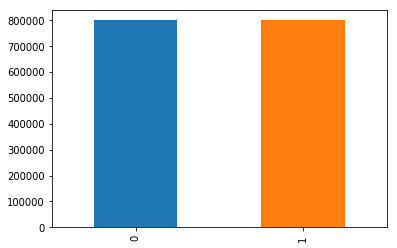

In [32]:
clean_tweets['label'].value_counts().plot(kind = 'bar')

In [33]:
clean_tweets['length'] = clean_tweets['clean tweet'].apply(len)

In [34]:
clean_tweets.length.describe() #max is 140 now

count    1.596041e+06
mean     5.928591e+01
std      3.245402e+01
min      1.000000e+00
25%      3.200000e+01
50%      5.500000e+01
75%      8.500000e+01
max      1.400000e+02
Name: length, dtype: float64

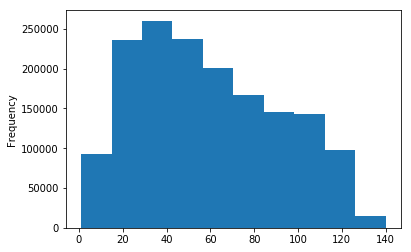

In [35]:
clean_tweets['length'].plot(kind='hist')

## Word Cloud
A word cloud represents word usage in a document by resizing individual words proportionally to its frequency and then presenting them in a random arrangement.Some of the concerns over word cloud is that, it supports only the crudest sorts of textual analysis, and it is often applied to situations where textual analysis is not appropriate, and it leaves viewers to figure out the context of the data by themselves without providing the narrative.

But in the case of tweets, textual analysis is the most important analysis, and it provides a general idea of what kind of words are frequent in the corpus, in a sort of quick and dirty way.

In [36]:
neg_tweets = clean_tweets[clean_tweets['label'] == 0]
neg_string = []
for t in neg_tweets['clean tweet']:
     neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

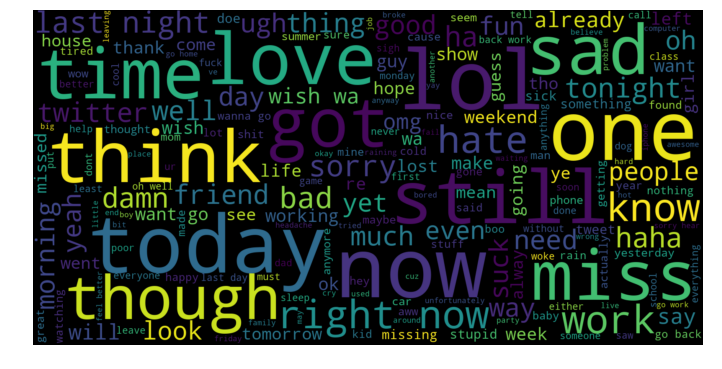

In [37]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some of big words can be interpreted quite neutral, such as “today”,”now”,etc. We can see some of the words in smaller size make sense to be in negative tweets, such as “damn”,”ugh”,”miss”,”bad”, etc. But there is “love” in rather big size, so we wanted to see what is happening.

In [38]:
for t in tweets[tweets['label']==0]['tweet'][:200]:
    if 'love' in t:
        print(t)

@LettyA ahh ive always wanted to see rent  love the soundtrack!!
@julieebaby awe i love you too!!!! 1 am here  i miss you
@mercedesashley Damn! The grind is inspirational and saddening at the same time.  Don't want you to stop cuz I like what u do! Much love
I'm missing you babe..  but as long as your alive I'm happy.. Yawwwnn.. I'm tired my love imma try to sleep hopefully you had a headstart
@robluketic  love the french. I tell people here in the south i'm qtr. french and they snarl at me.  french are beautiful people


Even though the tweets contain the word “love”, in these cases it is negative sentiment, because the tweet has mixed emotions like “love” but “miss”. Or sometimes used in a sarcastic way.

In [39]:
pos_tweets = clean_tweets[clean_tweets['label'] == 1]
pos_string = []
for t in pos_tweets['clean tweet']:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

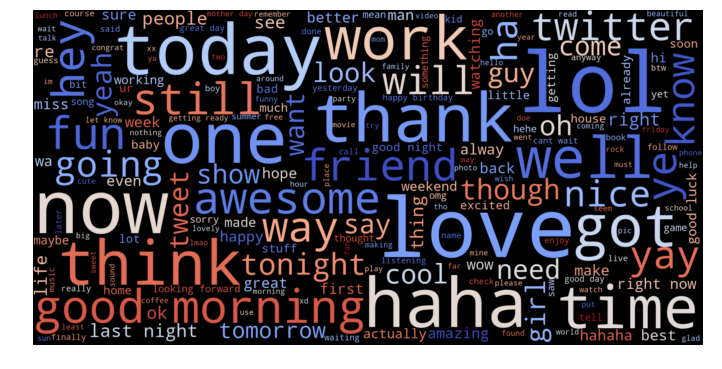

In [40]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap= 'coolwarm').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
from sklearn.utils import shuffle
clean_tweets = shuffle(clean_tweets)

In [42]:
clean_tweets.head()
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596041 entries, 1558142 to 393783
Data columns (total 3 columns):
clean tweet    1596041 non-null object
label          1596041 non-null int64
length         1596041 non-null int64
dtypes: int64(2), object(1)
memory usage: 48.7+ MB


## Preparion for data visualisation
In order to implement a couple of data visualisation in the next step, We need term frequency data. What kind of words are used in the tweets, and how many times it is used in entire corpus. We used count vectorizer to calculate the term frequencies.

There are parameter options available for count vectorizer, such as removing stop words, limiting the maximum number of terms. However, in order to get a full picture of the dataset first.

## Here, We implemented with stop words included, and not limiting the maximum number of features.

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(clean_tweets['clean tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [44]:
len(cvec.get_feature_names()) #count vectorizer has extracted 253020 words out of the corpus

253020

In [45]:
neg_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 0]['clean tweet'])
pos_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 1]['clean tweet'])
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [46]:
term_freq_df.head()

,0,1
aa,161,96
aaa,94,56
aaaa,45,29
aaaaa,26,12
aaaaaa,16,12


In [47]:
term_freq_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253020 entries, aa to zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz
Data columns (total 2 columns):
0    253020 non-null int64
1    253020 non-null int64
dtypes: int64(2)
memory usage: 5.8+ MB


In [48]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
to,313162,252567,565729
the,257836,265998,523834
it,182969,167030,349999
my,190775,125955,316730
and,153958,149642,303600
you,103844,198245,302089
not,194724,86861,281585
is,133432,111191,244623
in,115614,101223,216837
for,98999,117369,216368


## Now, We implemented without stop words, and limiting the maximum number of features to 10000
This time, the stop words will not help much, because of the same high-frequency words, such as "the", "to", will equally frequent in both classes. If these stop words dominate both of the classes, We won't be able to have a meaningful result.

In [49]:
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(clean_tweets['clean tweet'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [50]:
neg_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 0]['clean tweet'])
pos_doc_matrix = cvec.transform(clean_tweets[clean_tweets['label'] == 1]['clean tweet'])
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df2 = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [51]:
term_freq_df2.head()

,0,1
aa,161,96
aaa,94,56
aaaa,45,29
aaaaah,35,31
aaaah,76,61


In [52]:
term_freq_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, aa to zzzzzz
Data columns (total 2 columns):
0    10000 non-null int64
1    10000 non-null int64
dtypes: int64(2)
memory usage: 234.4+ KB


In [53]:
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:10]

,negative,positive,total
just,64004,62944,126948
wa,63108,47277,110385
day,52151,56920,109071
good,29251,62189,91440
like,41534,38365,79899
today,38362,30341,68703
work,46946,21698,68644
love,17825,50404,68229
time,31417,34370,65787
going,33690,30942,64632


In [197]:
df_sample100k = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

df_sample80k = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

df_sample60k = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

df_sample10000 = pd.DataFrame(columns = ['naive bayes', 'linear regression','logistic regression', 'random forest', 'svm'], index = ['time_with_tfidf','time_without_tfidf', 'accuracy_with_tfidf','accuracy_without_tfidf'])

In [198]:
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [199]:
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [200]:
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [201]:
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,NaN,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Null Accuracy (Baseline Model)

## Sample of 10,000 datapoints

In [202]:
clean_tweets_sample10000 = clean_tweets.sample(n=10000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.5073333333333333


In [203]:
clean_tweets_sample10000['label'].value_counts()

1    5071
0    4929
Name: label, dtype: int64

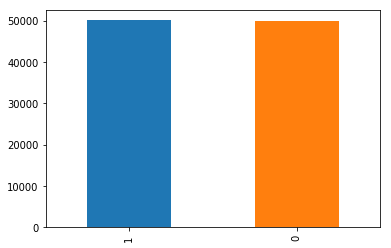

In [204]:
clean_tweets_sample100k['label'].value_counts().plot(kind  = 'bar')

## Sample of 60k datapoints

In [205]:
clean_tweets_sample60k = clean_tweets.sample(n=60000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.49972222222222223


In [206]:
clean_tweets_sample60k['label'].value_counts()

1    30113
0    29887
Name: label, dtype: int64

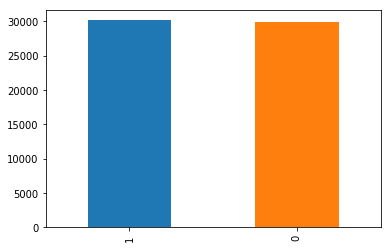

In [207]:
clean_tweets_sample60k['label'].value_counts().plot(kind  = 'bar')

## Sample of 80k datapoints

In [208]:
clean_tweets_sample80k = clean_tweets.sample(n=80000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.5044583333333333


In [209]:
clean_tweets_sample80k['label'].value_counts()

1    40141
0    39859
Name: label, dtype: int64

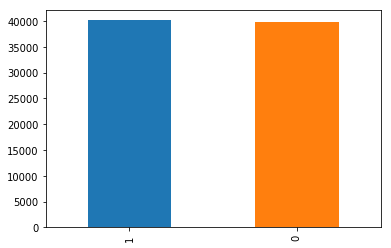

In [210]:
clean_tweets_sample80k['label'].value_counts().plot(kind  = 'bar')

## Sample of 100k datapoints

In [211]:
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
from sklearn.model_selection import train_test_split
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nullaccuracy=max(y_test.mean(), y_test.mean())
print("Null Accuracy : ",nullaccuracy)

Null Accuracy :  0.5009333333333333


In [212]:
clean_tweets_sample100k['label'].value_counts()

1    50067
0    49933
Name: label, dtype: int64

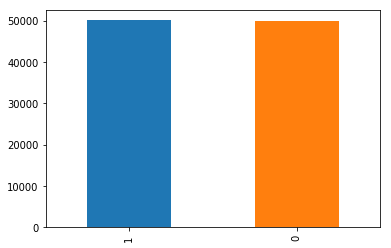

In [213]:
clean_tweets_sample100k['label'].value_counts().plot(kind  = 'bar')

## Naive bayes with TF IDF - Sample of 10000

In [214]:
from sklearn.feature_extraction.text import CountVectorizer

In [215]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [217]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [218]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['naive bayes']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [219]:
predictions = pipeline.predict(X_test)

In [220]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.71      0.71      0.71      1478
          1       0.72      0.72      0.72      1522

avg / total       0.71      0.71      0.71      3000



[[1050  428]
 [ 431 1091]]
0.7136666666666667


In [221]:
df_sample10000['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive bayes without TF IDF - Sample of 10000

In [222]:
cv = CountVectorizer(stop_words='english',max_features=10000)

In [223]:
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [225]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['naive bayes']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,NaN,NaN,NaN,NaN
time_without_tfidf,0,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [226]:
predictions = nb.predict(X_test)

In [227]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[38 13]
 [15 34]]
             precision    recall  f1-score   support

          0       0.72      0.75      0.73        51
          1       0.72      0.69      0.71        49

avg / total       0.72      0.72      0.72       100

0.72


In [228]:
df_sample10000['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,NaN,NaN,NaN,NaN
time_without_tfidf,0,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.72,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 10,000

In [277]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample10000 = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [279]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [280]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['linear regression']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,NaN,NaN,NaN
time_without_tfidf,0,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.72,NaN,NaN,NaN,NaN


In [281]:
predictions = pipeline.predict(X_test)

In [282]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.6427628873638762
Mean Squared error:  0.781226783417682
R2 Score:  -2.1255794805456545


## Linear Regression without TF IDF - Sample of 10,000

In [283]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [284]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['linear regression']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,NaN,NaN,NaN
time_without_tfidf,0,7.95312,NaN,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.72,NaN,NaN,NaN,NaN


In [285]:
predictions = lr.predict(X_test)

In [286]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.7632114965505044
Mean Squared error:  1.1387323458855612
R2 Score:  -3.5559094102776108


## Logistic Regression with TF IDF - Sample of 10,000

In [287]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [288]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [289]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['logistic regression']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,NaN,NaN
time_without_tfidf,0,7.95312,NaN,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.72,NaN,NaN,NaN,NaN


In [290]:
predictions = pipeline.predict(X_test)

In [291]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.69      0.71      1478
          1       0.72      0.75      0.74      1522

avg / total       0.72      0.72      0.72      3000



[[1025  453]
 [ 374 1148]]
Accuracy is 0.7243333333333334


In [292]:
df_sample10000['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,NaN,NaN
time_without_tfidf,0,7.95312,NaN,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,0.724333,NaN,NaN
accuracy_without_tfidf,0.72,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 10,000

In [293]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [294]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['logistic regression']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,NaN,NaN
time_without_tfidf,0,7.95312,0.15625,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,0.724333,NaN,NaN
accuracy_without_tfidf,0.72,NaN,NaN,NaN,NaN


In [295]:
predictions = log_model.predict(X_test)

In [296]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[ 995  483]
 [ 385 1137]]
             precision    recall  f1-score   support

          0       0.72      0.67      0.70      1478
          1       0.70      0.75      0.72      1522

avg / total       0.71      0.71      0.71      3000

Accuracy is:  0.7106666666666667


In [297]:
df_sample10000['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,NaN,NaN
time_without_tfidf,0,7.95312,0.15625,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,0.724333,NaN,NaN
accuracy_without_tfidf,0.72,NaN,0.710667,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 100k

In [298]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [300]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [301]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['random forest']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,2.26562,NaN
time_without_tfidf,0,7.95312,0.15625,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,0.724333,NaN,NaN
accuracy_without_tfidf,0.72,NaN,0.710667,NaN,NaN


In [302]:
predictions = pipeline.predict(X_test)

In [303]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.67      0.69      0.68      1478
          1       0.69      0.67      0.68      1522

avg / total       0.68      0.68      0.68      3000



[[1015  463]
 [ 499 1023]]
Accuracy is 0.6793333333333333


In [304]:
df_sample10000['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,2.26562,NaN
time_without_tfidf,0,7.95312,0.15625,NaN,NaN
accuracy_with_tfidf,0.713667,NaN,0.724333,0.679333,NaN
accuracy_without_tfidf,0.72,NaN,0.710667,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 10,000

In [305]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [306]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['random forest']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,2.26562,NaN
time_without_tfidf,0,7.95312,0.15625,3.90625,NaN
accuracy_with_tfidf,0.713667,NaN,0.724333,0.679333,NaN
accuracy_without_tfidf,0.72,NaN,0.710667,NaN,NaN


In [307]:
predictions = rf.predict(X_test)

In [308]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[1022  456]
 [ 494 1028]]
             precision    recall  f1-score   support

          0       0.67      0.69      0.68      1478
          1       0.69      0.68      0.68      1522

avg / total       0.68      0.68      0.68      3000

Accuracy is:  0.6833333333333333


In [309]:
df_sample10000['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,2.26562,NaN
time_without_tfidf,0,7.95312,0.15625,3.90625,NaN
accuracy_with_tfidf,0.713667,NaN,0.724333,0.679333,NaN
accuracy_without_tfidf,0.72,NaN,0.710667,0.683333,NaN


## Support Vector Machines with TF IDF - Sample of 10,000

In [310]:
from sklearn.svm import SVC
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample10000['clean tweet']
y = clean_tweets_sample10000['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [312]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [313]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['svm']['time_with_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,2.26562,7.60938
time_without_tfidf,0,7.95312,0.15625,3.90625,NaN
accuracy_with_tfidf,0.713667,NaN,0.724333,0.679333,NaN
accuracy_without_tfidf,0.72,NaN,0.710667,0.683333,NaN


In [314]:
predictions = pipeline.predict(X_test)

In [315]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1478
          1       0.51      1.00      0.67      1522

avg / total       0.26      0.51      0.34      3000



[[   0 1478]
 [   0 1522]]
Accuracy is 0.5073333333333333


C:\Users\arush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [316]:
df_sample10000['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,2.26562,7.60938
time_without_tfidf,0,7.95312,0.15625,3.90625,NaN
accuracy_with_tfidf,0.713667,NaN,0.724333,0.679333,0.507333
accuracy_without_tfidf,0.72,NaN,0.710667,0.683333,NaN


## Support Vector Machines without tfidf - Sample of 10,000

In [317]:
model = SVC()

In [318]:
X = cv.fit_transform(clean_tweets_sample10000['clean tweet'])
y = clean_tweets_sample10000['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [319]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample10000['svm']['time_without_tfidf'] = t3
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,2.26562,7.60938
time_without_tfidf,0,7.95312,0.15625,3.90625,6.625
accuracy_with_tfidf,0.713667,NaN,0.724333,0.679333,0.507333
accuracy_without_tfidf,0.72,NaN,0.710667,0.683333,NaN


In [320]:
predictions = model.predict(X_test)

In [321]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[   0 1478]
 [   0 1522]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1478
          1       0.51      1.00      0.67      1522

avg / total       0.26      0.51      0.34      3000

Accuracy is:  0.5073333333333333


C:\Users\arush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [322]:
df_sample10000['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample10000.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.140625,3.54688,0.1875,2.26562,7.60938
time_without_tfidf,0,7.95312,0.15625,3.90625,6.625
accuracy_with_tfidf,0.713667,NaN,0.724333,0.679333,0.507333
accuracy_without_tfidf,0.72,NaN,0.710667,0.683333,0.507333


## Naive bayes with TF IDF - Sample of 60k

In [323]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [324]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [326]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [327]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['naive bayes']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [328]:
predictions = pipeline.predict(X_test)

In [329]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.73      0.73      9005
          1       0.73      0.73      0.73      8995

avg / total       0.73      0.73      0.73     18000



[[6613 2392]
 [2399 6596]]
0.7338333333333333


In [330]:
df_sample60k['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive Bayes without using tfidf - Sample 60k

In [331]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [332]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [334]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['naive bayes']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,NaN,NaN,NaN,NaN
time_without_tfidf,0.015625,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [335]:
predictions = nb.predict(X_test)

In [336]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[207  87]
 [ 86 220]]
             precision    recall  f1-score   support

          0       0.71      0.70      0.71       294
          1       0.72      0.72      0.72       306

avg / total       0.71      0.71      0.71       600

0.7116666666666667


In [337]:
df_sample60k['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,NaN,NaN,NaN,NaN
time_without_tfidf,0.015625,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.711667,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 60k

In [338]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [340]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [341]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['linear regression']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,NaN,NaN,NaN
time_without_tfidf,0.015625,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.711667,NaN,NaN,NaN,NaN


In [342]:
predictions = pipeline.predict(X_test)

In [343]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.3790211892990629
Mean Squared error:  0.2180515433857672
R2 Score:  0.12779355725741215


## Linear Regression without TF IDF - Sample of 60k

In [344]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [345]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['linear regression']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,NaN,NaN,NaN
time_without_tfidf,0.015625,11.4219,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.711667,NaN,NaN,NaN,NaN


In [346]:
predictions = lr.predict(X_test)

In [347]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.4119297936922118
Mean Squared error:  0.25567716388324435
R2 Score:  -0.022708971183893922


## Logistic Regression with TF IDF - Sample of 60k

In [348]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [349]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [350]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['logistic regression']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,NaN,NaN
time_without_tfidf,0.015625,11.4219,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.711667,NaN,NaN,NaN,NaN


In [351]:
predictions = pipeline.predict(X_test)

In [352]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.73      0.74      9005
          1       0.74      0.76      0.75      8995

avg / total       0.74      0.74      0.74     18000



[[6539 2466]
 [2148 6847]]
Accuracy is 0.7436666666666667


In [353]:
df_sample60k['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,NaN,NaN
time_without_tfidf,0.015625,11.4219,NaN,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.743667,NaN,NaN
accuracy_without_tfidf,0.711667,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 60k

In [354]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [355]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['logistic regression']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,NaN,NaN
time_without_tfidf,0.015625,11.4219,1.95312,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.743667,NaN,NaN
accuracy_without_tfidf,0.711667,NaN,NaN,NaN,NaN


In [356]:
predictions = log_model.predict(X_test)

In [357]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[6470 2535]
 [2155 6840]]
             precision    recall  f1-score   support

          0       0.75      0.72      0.73      9005
          1       0.73      0.76      0.74      8995

avg / total       0.74      0.74      0.74     18000

Accuracy is:  0.7394444444444445


In [358]:
df_sample60k['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,NaN,NaN
time_without_tfidf,0.015625,11.4219,1.95312,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.743667,NaN,NaN
accuracy_without_tfidf,0.711667,NaN,0.739444,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 60k

In [359]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [361]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [362]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['random forest']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,20.7656,NaN
time_without_tfidf,0.015625,11.4219,1.95312,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.743667,NaN,NaN
accuracy_without_tfidf,0.711667,NaN,0.739444,NaN,NaN


In [363]:
predictions = pipeline.predict(X_test)

In [364]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.73      0.72      9005
          1       0.72      0.69      0.71      8995

avg / total       0.71      0.71      0.71     18000



[[6578 2427]
 [2774 6221]]
Accuracy is 0.7110555555555556


In [365]:
df_sample60k['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,20.7656,NaN
time_without_tfidf,0.015625,11.4219,1.95312,NaN,NaN
accuracy_with_tfidf,0.733833,NaN,0.743667,0.711056,NaN
accuracy_without_tfidf,0.711667,NaN,0.739444,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 60k

In [366]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [367]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['random forest']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,20.7656,NaN
time_without_tfidf,0.015625,11.4219,1.95312,26.0938,NaN
accuracy_with_tfidf,0.733833,NaN,0.743667,0.711056,NaN
accuracy_without_tfidf,0.711667,NaN,0.739444,NaN,NaN


In [368]:
predictions = rf.predict(X_test)

In [369]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[6420 2585]
 [2805 6190]]
             precision    recall  f1-score   support

          0       0.70      0.71      0.70      9005
          1       0.71      0.69      0.70      8995

avg / total       0.70      0.70      0.70     18000

Accuracy is:  0.7005555555555556


In [370]:
df_sample60k['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,20.7656,NaN
time_without_tfidf,0.015625,11.4219,1.95312,26.0938,NaN
accuracy_with_tfidf,0.733833,NaN,0.743667,0.711056,NaN
accuracy_without_tfidf,0.711667,NaN,0.739444,0.700556,NaN


## Support Vector Machines with TF IDF - Sample of 60k

In [371]:
from sklearn.svm import SVC
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample60k['clean tweet']
y = clean_tweets_sample60k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [373]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [374]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['svm']['time_with_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,20.7656,226.812
time_without_tfidf,0.015625,11.4219,1.95312,26.0938,NaN
accuracy_with_tfidf,0.733833,NaN,0.743667,0.711056,NaN
accuracy_without_tfidf,0.711667,NaN,0.739444,0.700556,NaN


In [375]:
predictions = pipeline.predict(X_test)

In [376]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00      9005
          1       0.50      1.00      0.67      8995

avg / total       0.25      0.50      0.33     18000



[[   0 9005]
 [   0 8995]]
Accuracy is 0.49972222222222223


C:\Users\arush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [377]:
df_sample60k['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,20.7656,226.812
time_without_tfidf,0.015625,11.4219,1.95312,26.0938,NaN
accuracy_with_tfidf,0.733833,NaN,0.743667,0.711056,0.499722
accuracy_without_tfidf,0.711667,NaN,0.739444,0.700556,NaN


## Support Vector Machines without tfidf - Sample of 60k

In [378]:
model = SVC()

In [379]:
X = cv.fit_transform(clean_tweets_sample60k['clean tweet'])
y = clean_tweets_sample60k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [380]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample60k['svm']['time_without_tfidf'] = t3
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,20.7656,226.812
time_without_tfidf,0.015625,11.4219,1.95312,26.0938,244.25
accuracy_with_tfidf,0.733833,NaN,0.743667,0.711056,0.499722
accuracy_without_tfidf,0.711667,NaN,0.739444,0.700556,NaN


In [381]:
predictions = model.predict(X_test)

In [382]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[   0 9005]
 [   0 8995]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      9005
          1       0.50      1.00      0.67      8995

avg / total       0.25      0.50      0.33     18000

Accuracy is:  0.49972222222222223


C:\Users\arush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [383]:
df_sample60k['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample60k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,0.75,7.32812,1.8125,20.7656,226.812
time_without_tfidf,0.015625,11.4219,1.95312,26.0938,244.25
accuracy_with_tfidf,0.733833,NaN,0.743667,0.711056,0.499722
accuracy_without_tfidf,0.711667,NaN,0.739444,0.700556,0.499722


## Naive bayes with TF IDF - Sample of 80k

In [384]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [385]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [386]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [387]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [388]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['naive bayes']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [389]:
predictions = pipeline.predict(X_test)

In [390]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.74      0.74     11893
          1       0.74      0.74      0.74     12107

avg / total       0.74      0.74      0.74     24000



[[8783 3110]
 [3176 8931]]
0.7380833333333333


In [391]:
df_sample80k['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive Bayes without using tfidf - Sample 80k

In [392]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [393]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [395]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['naive bayes']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,NaN,NaN,NaN,NaN
time_without_tfidf,0.03125,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [396]:
predictions = nb.predict(X_test)

In [397]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[299  76]
 [ 86 339]]
             precision    recall  f1-score   support

          0       0.78      0.80      0.79       375
          1       0.82      0.80      0.81       425

avg / total       0.80      0.80      0.80       800

0.7975


In [398]:
df_sample80k['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,NaN,NaN,NaN,NaN
time_without_tfidf,0.03125,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.7975,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 80k

In [399]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [401]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [402]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['linear regression']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,NaN,NaN,NaN
time_without_tfidf,0.03125,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.7975,NaN,NaN,NaN,NaN


In [403]:
predictions = pipeline.predict(X_test)

In [404]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.3660893952372128
Mean Squared error:  0.19959948352923987
R2 Score:  0.20153858265549052


## Linear Regression without TF IDF - Sample of 80k

In [405]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [406]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['linear regression']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,NaN,NaN,NaN
time_without_tfidf,0.03125,9.65625,NaN,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.7975,NaN,NaN,NaN,NaN


In [407]:
predictions = lr.predict(X_test)

In [408]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.3954136969757817
Mean Squared error:  0.22860602748132566
R2 Score:  0.08550318122693235


## Logistic Regression with TF IDF - Sample of 80k

In [409]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [410]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [411]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['logistic regression']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,NaN,NaN
time_without_tfidf,0.03125,9.65625,NaN,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.7975,NaN,NaN,NaN,NaN


In [412]:
predictions = pipeline.predict(X_test)

In [413]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.73      0.74     11893
          1       0.74      0.77      0.75     12107

avg / total       0.75      0.75      0.75     24000



[[8638 3255]
 [2813 9294]]
Accuracy is 0.7471666666666666


In [414]:
df_sample80k['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,NaN,NaN
time_without_tfidf,0.03125,9.65625,NaN,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,0.747167,NaN,NaN
accuracy_without_tfidf,0.7975,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 80k

In [415]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [416]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['logistic regression']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,NaN,NaN
time_without_tfidf,0.03125,9.65625,3.625,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,0.747167,NaN,NaN
accuracy_without_tfidf,0.7975,NaN,NaN,NaN,NaN


In [417]:
predictions = log_model.predict(X_test)

In [418]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[8560 3333]
 [2821 9286]]
             precision    recall  f1-score   support

          0       0.75      0.72      0.74     11893
          1       0.74      0.77      0.75     12107

avg / total       0.74      0.74      0.74     24000

Accuracy is:  0.7435833333333334


In [419]:
df_sample80k['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,NaN,NaN
time_without_tfidf,0.03125,9.65625,3.625,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,0.747167,NaN,NaN
accuracy_without_tfidf,0.7975,NaN,0.743583,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 80k

In [421]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [422]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [423]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [424]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['random forest']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,28.1719,NaN
time_without_tfidf,0.03125,9.65625,3.625,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,0.747167,NaN,NaN
accuracy_without_tfidf,0.7975,NaN,0.743583,NaN,NaN


In [425]:
predictions = pipeline.predict(X_test)

In [426]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.74      0.72     11893
          1       0.73      0.69      0.71     12107

avg / total       0.72      0.71      0.71     24000



[[8796 3097]
 [3761 8346]]
Accuracy is 0.71425


In [427]:
df_sample80k['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,28.1719,NaN
time_without_tfidf,0.03125,9.65625,3.625,NaN,NaN
accuracy_with_tfidf,0.738083,NaN,0.747167,0.71425,NaN
accuracy_without_tfidf,0.7975,NaN,0.743583,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 80k

In [428]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [429]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['random forest']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,28.1719,NaN
time_without_tfidf,0.03125,9.65625,3.625,28.3438,NaN
accuracy_with_tfidf,0.738083,NaN,0.747167,0.71425,NaN
accuracy_without_tfidf,0.7975,NaN,0.743583,NaN,NaN


In [430]:
predictions = rf.predict(X_test)

In [431]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[8590 3303]
 [3651 8456]]
             precision    recall  f1-score   support

          0       0.70      0.72      0.71     11893
          1       0.72      0.70      0.71     12107

avg / total       0.71      0.71      0.71     24000

Accuracy is:  0.71025


In [432]:
df_sample80k['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,28.1719,NaN
time_without_tfidf,0.03125,9.65625,3.625,28.3438,NaN
accuracy_with_tfidf,0.738083,NaN,0.747167,0.71425,NaN
accuracy_without_tfidf,0.7975,NaN,0.743583,0.71025,NaN


## Support Vector Machines with TF IDF - Sample of 80k

In [433]:
from sklearn.svm import SVC
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample80k['clean tweet']
y = clean_tweets_sample80k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [435]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [436]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['svm']['time_with_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,28.1719,429.328
time_without_tfidf,0.03125,9.65625,3.625,28.3438,NaN
accuracy_with_tfidf,0.738083,NaN,0.747167,0.71425,NaN
accuracy_without_tfidf,0.7975,NaN,0.743583,0.71025,NaN


In [437]:
predictions = pipeline.predict(X_test)

In [438]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     11893
          1       0.50      1.00      0.67     12107

avg / total       0.25      0.50      0.34     24000



[[    0 11893]
 [    0 12107]]
Accuracy is 0.5044583333333333


C:\Users\arush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [439]:
df_sample80k['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,28.1719,429.328
time_without_tfidf,0.03125,9.65625,3.625,28.3438,NaN
accuracy_with_tfidf,0.738083,NaN,0.747167,0.71425,0.504458
accuracy_without_tfidf,0.7975,NaN,0.743583,0.71025,NaN


## Support Vector Machines without tfidf - Sample of 80k

In [440]:
model = SVC()

In [442]:
X = cv.fit_transform(clean_tweets_sample80k['clean tweet'])
y = clean_tweets_sample80k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [443]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample80k['svm']['time_without_tfidf'] = t3
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,28.1719,429.328
time_without_tfidf,0.03125,9.65625,3.625,28.3438,443.766
accuracy_with_tfidf,0.738083,NaN,0.747167,0.71425,0.504458
accuracy_without_tfidf,0.7975,NaN,0.743583,0.71025,NaN


In [444]:
predictions = model.predict(X_test)

In [445]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[   76 11817]
 [    9 12098]]
             precision    recall  f1-score   support

          0       0.89      0.01      0.01     11893
          1       0.51      1.00      0.67     12107

avg / total       0.70      0.51      0.35     24000

Accuracy is:  0.50725


In [446]:
df_sample80k['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample80k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.125,8.48438,3,28.1719,429.328
time_without_tfidf,0.03125,9.65625,3.625,28.3438,443.766
accuracy_with_tfidf,0.738083,NaN,0.747167,0.71425,0.504458
accuracy_without_tfidf,0.7975,NaN,0.743583,0.71025,0.50725


## Naive bayes with TF IDF - Sample of 100k

In [229]:
from sklearn.feature_extraction.text import CountVectorizer
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)

In [230]:
from sklearn.model_selection import train_test_split
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [232]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [233]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['naive bayes']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [234]:
predictions = pipeline.predict(X_test)

In [235]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.74      0.74      0.74     14972
          1       0.74      0.74      0.74     15028

avg / total       0.74      0.74      0.74     30000



[[11136  3836]
 [ 3978 11050]]
0.7395333333333334


In [236]:
df_sample100k['naive bayes']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,NaN,NaN,NaN,NaN
time_without_tfidf,NaN,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


## Naive Bayes without using tfidf - Sample 100k

In [237]:
# cv = CountVectorizer()
cv = CountVectorizer(stop_words='english',max_features=10000)

In [238]:
# X = cv.fit_transform(clean_tweets['clean tweet'])
# y = clean_tweets['label']

X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=101)
nb = MultinomialNB()

In [240]:
t1 = time.process_time()
nb.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['naive bayes']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,NaN,NaN,NaN,NaN
time_without_tfidf,0.03125,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,NaN,NaN,NaN
accuracy_without_tfidf,NaN,NaN,NaN,NaN,NaN


In [241]:
predictions = nb.predict(X_test)

In [242]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[353 146]
 [135 366]]
             precision    recall  f1-score   support

          0       0.72      0.71      0.72       499
          1       0.71      0.73      0.72       501

avg / total       0.72      0.72      0.72      1000

0.719


In [243]:
df_sample100k['naive bayes']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,NaN,NaN,NaN,NaN
time_without_tfidf,0.03125,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.719,NaN,NaN,NaN,NaN


## Linear Regression with TF IDF Sample of 100k

In [244]:
from sklearn.linear_model import LinearRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [246]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LinearRegression()),  # train on TF-IDF vectors w/ Linear Regression classifier
])

In [247]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['linear regression']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,10.8125,NaN,NaN,NaN
time_without_tfidf,0.03125,NaN,NaN,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.719,NaN,NaN,NaN,NaN


In [248]:
predictions = pipeline.predict(X_test)

In [249]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))
# rpredictions = predictions.astype()
# print (classification_report(y_test,rpredictions))
# print ('\n')
# print (confusion_matrix(y_test,rpredictions))
# print("Accuracy is", accuracy_score(y_test,predictions))

Mean Absolute error:  0.36203600846948264
Mean Squared error:  0.19132496903902302
R2 Score:  0.23469745718971424


## Linear Regression without TF IDF - Sample of 100k

In [251]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()

In [252]:
t1 = time.process_time()
lr.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['linear regression']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,10.8125,NaN,NaN,NaN
time_without_tfidf,0.03125,13.125,NaN,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.719,NaN,NaN,NaN,NaN


In [253]:
predictions = lr.predict(X_test)

In [254]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Absolute error: ",mean_absolute_error(y_test,predictions))
print("Mean Squared error: ",mean_squared_error(y_test,predictions))
print ("R2 Score: ",r2_score(y_test,predictions))

Mean Absolute error:  0.38587262625658963
Mean Squared error:  0.20993477370748484
R2 Score:  0.16025797913564122


## Logistic Regression with TF IDF - Sample of 100k

In [255]:
from sklearn.linear_model import LogisticRegression
# clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [256]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression classifier
])

In [257]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['logistic regression']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,10.8125,4.75,NaN,NaN
time_without_tfidf,0.03125,13.125,NaN,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,NaN,NaN,NaN
accuracy_without_tfidf,0.719,NaN,NaN,NaN,NaN


In [258]:
predictions = pipeline.predict(X_test)

In [259]:
print (classification_report(y_test,predictions.round()))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.73      0.74     14972
          1       0.74      0.77      0.75     15028

avg / total       0.75      0.75      0.75     30000



[[10965  4007]
 [ 3520 11508]]
Accuracy is 0.7491


In [260]:
df_sample100k['logistic regression']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,10.8125,4.75,NaN,NaN
time_without_tfidf,0.03125,13.125,NaN,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,0.7491,NaN,NaN
accuracy_without_tfidf,0.719,NaN,NaN,NaN,NaN


## Logistic Regression without TF IDF - Sample of 100k

In [262]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
log_model = LogisticRegression()

In [263]:
t1 = time.process_time()
log_model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['logistic regression']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,10.8125,4.75,NaN,NaN
time_without_tfidf,0.03125,13.125,6.64062,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,0.7491,NaN,NaN
accuracy_without_tfidf,0.719,NaN,NaN,NaN,NaN


In [264]:
predictions = log_model.predict(X_test)

In [265]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions.round()))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[10866  4106]
 [ 3529 11499]]
             precision    recall  f1-score   support

          0       0.75      0.73      0.74     14972
          1       0.74      0.77      0.75     15028

avg / total       0.75      0.75      0.75     30000

Accuracy is:  0.7455


In [266]:
df_sample100k['logistic regression']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,10.8125,4.75,NaN,NaN
time_without_tfidf,0.03125,13.125,6.64062,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,0.7491,NaN,NaN
accuracy_without_tfidf,0.719,NaN,0.7455,NaN,NaN


## Random Forest Classification with TF IDF - Sample of 100k

In [267]:
from sklearn.feature_extraction.text import CountVectorizer
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [269]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()),  # train on TF-IDF vectors w/ Random Forest classifier
])

In [270]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['random forest']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,10.8125,4.75,41.1094,NaN
time_without_tfidf,0.03125,13.125,6.64062,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,0.7491,NaN,NaN
accuracy_without_tfidf,0.719,NaN,0.7455,NaN,NaN


In [99]:
predictions = pipeline.predict(X_test)

In [100]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.70      0.74      0.72     14972
          1       0.73      0.69      0.70     15028

avg / total       0.71      0.71      0.71     30000



[[11080  3892]
 [ 4729 10299]]
Accuracy is 0.7126333333333333


In [101]:
df_sample100k['random forest']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.6875,11.7969,4.42188,45.2188,NaN
time_without_tfidf,0.046875,13.4219,6.67188,NaN,NaN
accuracy_with_tfidf,0.739533,NaN,0.7491,0.712633,NaN
accuracy_without_tfidf,0.719,NaN,0.7455,NaN,NaN


## Random Forest Classification without TF IDF - Sample of 100k

In [271]:
cv = CountVectorizer(stop_words='english',max_features=10000)
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
rf = RandomForestClassifier()

In [272]:
t1 = time.process_time()
rf.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['random forest']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,10.8125,4.75,41.1094,NaN
time_without_tfidf,0.03125,13.125,6.64062,42.5156,NaN
accuracy_with_tfidf,0.739533,NaN,0.7491,NaN,NaN
accuracy_without_tfidf,0.719,NaN,0.7455,NaN,NaN


In [274]:
predictions = rf.predict(X_test)

In [275]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[10929  4043]
 [ 4579 10449]]
             precision    recall  f1-score   support

          0       0.70      0.73      0.72     14972
          1       0.72      0.70      0.71     15028

avg / total       0.71      0.71      0.71     30000

Accuracy is:  0.7126


In [276]:
df_sample100k['random forest']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.51562,10.8125,4.75,41.1094,NaN
time_without_tfidf,0.03125,13.125,6.64062,42.5156,NaN
accuracy_with_tfidf,0.739533,NaN,0.7491,NaN,NaN
accuracy_without_tfidf,0.719,NaN,0.7455,0.7126,NaN


## Support Vector Machines with TF IDF - Sample of 100k

In [107]:
from sklearn.svm import SVC
clean_tweets_sample100k = clean_tweets.sample(n=100000, random_state=101)
X = clean_tweets_sample100k['clean tweet']
y = clean_tweets_sample100k['label']
# X = clean_tweets['clean tweet']
# y = clean_tweets['label']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [109]:
pipeline = Pipeline([
    ('bow', CountVectorizer(stop_words='english',max_features=10000)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SVC()),  # train on TF-IDF vectors w/ SVM classifier
])

In [110]:
t1 = time.process_time()
pipeline.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['svm']['time_with_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.6875,11.7969,4.42188,45.2188,722.781
time_without_tfidf,0.046875,13.4219,6.67188,44.8281,NaN
accuracy_with_tfidf,0.739533,NaN,0.7491,0.712633,NaN
accuracy_without_tfidf,0.719,NaN,0.7455,0.708967,NaN


In [111]:
predictions = pipeline.predict(X_test)

In [112]:
print (classification_report(y_test,predictions))
print ('\n')
print (confusion_matrix(y_test,predictions))
print("Accuracy is", accuracy_score(y_test,predictions))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00     14972
          1       0.50      1.00      0.67     15028

avg / total       0.25      0.50      0.33     30000



[[    0 14972]
 [    0 15028]]
Accuracy is 0.5009333333333333


C:\Users\arush\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [113]:
df_sample100k['svm']['accuracy_with_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.6875,11.7969,4.42188,45.2188,722.781
time_without_tfidf,0.046875,13.4219,6.67188,44.8281,NaN
accuracy_with_tfidf,0.739533,NaN,0.7491,0.712633,0.500933
accuracy_without_tfidf,0.719,NaN,0.7455,0.708967,NaN


## Support Vector Machines without tfidf - Sample of 100k

In [114]:
model = SVC()

In [115]:
X = cv.fit_transform(clean_tweets_sample100k['clean tweet'])
y = clean_tweets_sample100k['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [116]:
t1 = time.process_time()
model.fit(X_train,y_train)
t2 = time.process_time()
t3=t2-t1
df_sample100k['svm']['time_without_tfidf'] = t3
df_sample100k.head()

,naive bayes,linear regression,logistic regression,random forest,svm
time_with_tfidf,1.6875,11.7969,4.42188,45.2188,722.781
time_without_tfidf,0.046875,13.4219,6.67188,44.8281,925.047
accuracy_with_tfidf,0.739533,NaN,0.7491,0.712633,0.500933
accuracy_without_tfidf,0.719,NaN,0.7455,0.708967,NaN


In [117]:
predictions = model.predict(X_test)

In [118]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print("Accuracy is: ",accuracy_score(y_test,predictions))

[[ 1193 13779]
 [  215 14813]]
             precision    recall  f1-score   support

          0       0.85      0.08      0.15     14972
          1       0.52      0.99      0.68     15028

avg / total       0.68      0.53      0.41     30000

Accuracy is:  0.5335333333333333


In [128]:
df_sample100k['svm']['accuracy_without_tfidf'] = accuracy_score(y_test,predictions)
df_sample100k.head()

,naive bayes,logistic regression,random forest,svm
time_with_tfidf,1.6875,4.42188,45.2188,722.781
time_without_tfidf,0.046875,6.67188,44.8281,925.047
accuracy_with_tfidf,0.739533,0.7491,0.712633,0.500933
accuracy_without_tfidf,0.719,0.7455,0.708967,0.533533


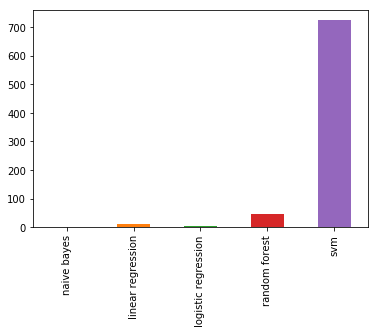

In [120]:
df_sample100k.loc['time_with_tfidf'].plot(kind = 'bar')

In [125]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)